In [5]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [6]:
df = pd.read_csv('credit_risk_dataset1.csv')

# Data Preparation and Model Building Pipeline
* Identifying the inputs (X) and output (y)
* Split into train and test (X_train, X_test, y_train, y_test)
* Data Preparation: Data Cleaning and Feature Engineering.
* Clean the training data
* Preprocess the training data (X_train_transformed)
* Training Phase: Build a model
* Preprocess the test data (X_test_transformed)
* Predict on unseen data
* Evaluate the model performance

# Identifying the inputs (X) and output (y)

In [7]:
df.columns

Index(['Unnamed: 0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### Inputs
* 'person_age'
* 'person_income'
* 'person_home_ownership'
* 'person_emp_length' 
* 'loan_intent'
* 'loan_grade'
* 'loan_amnt',
* 'loan_int_rate'
* 'loan_status'
* 'loan_percent_income'
* 'cb_person_default_on_file'
* 'cb_person_cred_hist_length'
### output
* 'loan_status'

### Step 3 - Segregate Inputs (X) and Output (y)

In [8]:
df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
y = df.pop('loan_status')
X = df

In [10]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,16.02,0.15,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,0.15,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,15.23,0.15,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,14.27,0.15,Y,4.0


### Step 4 - Split the data into Train and Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24320, 11) (24320,)
(8107, 11) (8107,)


# Step 5 - Apply Data Preparation on Training Data

* Separate Numerical and Categorical Features
* Feature Engineering/Extraction/Transformation
* Applying Standardization on Numerical Features
* Applying LabelEncoding on Categorical Features

In [12]:
X_train.dtypes

person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object

### Separate Numerical and Categorical Features

In [13]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

### Numerical Feature Transformation 
* Normalization
* Standardization (We will use this method in this project)
### Categorical Feature Transformation 
* One Hot Encoding
* Label Encoding
* Ordinal Encoding (We will us this method in this project)

### Tranformation on X_train Data

### Numerical Feature Transformation: Applying Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2778,-0.627475,-0.093122,-0.118705,0.686069,-0.642377,0.488384,-0.715951
21362,0.049362,-1.509330,-1.297761,-0.545711,-1.090839,1.752059,-0.095702
5453,-0.627475,-0.503077,0.176058,-0.751008,0.662800,-0.564679,-0.405827
1540,-0.853087,-1.062107,-1.002997,-1.479811,1.411267,-1.196517,-0.405827
32411,-0.176250,-0.316734,-0.708233,2.328443,-1.084653,2.489203,-0.405827


### Categorical Feature Transformation: Applying Ordinal Encoding

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat), 
                                     columns=ordinal_encoder.get_feature_names_out(), 
                                     index = X_train_cat.index)

X_train_cat_transformed.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2778,3.0,2.0,0.0,0.0
21362,3.0,0.0,0.0,0.0
5453,0.0,1.0,0.0,0.0
1540,3.0,4.0,3.0,0.0
32411,3.0,0.0,0.0,0.0


### Concatenate X_train_num_transformed and X_train_cat_transformed

In [16]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2778,-0.627475,-0.093122,-0.118705,0.686069,-0.642377,0.488384,-0.715951,3.0,2.0,0.0,0.0
21362,0.049362,-1.509330,-1.297761,-0.545711,-1.090839,1.752059,-0.095702,3.0,0.0,0.0,0.0
5453,-0.627475,-0.503077,0.176058,-0.751008,0.662800,-0.564679,-0.405827,0.0,1.0,0.0,0.0
1540,-0.853087,-1.062107,-1.002997,-1.479811,1.411267,-1.196517,-0.405827,3.0,4.0,3.0,0.0
32411,-0.176250,-0.316734,-0.708233,2.328443,-1.084653,2.489203,-0.405827,3.0,0.0,0.0,0.0


### Step 7 - Apply Data Preparation on X_test Data

In [17]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

### Numerical Feature Transformation: Applying Standardization


In [18]:
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25189,0.726199,0.055952,-0.118705,0.686069,-0.008345,0.383078,1.454919
28894,1.177424,-0.685694,-0.413469,-0.304487,0.610222,0.172465,0.214422
883,-1.078700,-1.741887,-1.297761,-1.572194,0.916413,-0.775292,-0.405827
13504,-0.627475,-0.316734,-1.297761,0.788717,-0.970218,0.909609,-0.715951
1814,-1.304312,-1.229816,0.470822,-1.366898,0.758678,-0.880598,-1.026075


### Categorical Feature Transformation: Applying Ordinal Encoding


In [21]:
X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat), 
                                    columns = ordinal_encoder.get_feature_names_out(), 
                                     index = X_test_cat.index)

X_test_cat_transformed.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25189,3.0,4.0,1.0,0.0
28894,3.0,3.0,2.0,1.0
883,3.0,5.0,2.0,0.0
13504,3.0,0.0,0.0,0.0
1814,3.0,1.0,2.0,0.0


### Concatenate X_test_num_transformed and X_test_cat_transformed

In [22]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25189,0.726199,0.055952,-0.118705,0.686069,-0.008345,0.383078,1.454919,3.0,4.0,1.0,0.0
28894,1.177424,-0.685694,-0.413469,-0.304487,0.610222,0.172465,0.214422,3.0,3.0,2.0,1.0
883,-1.078700,-1.741887,-1.297761,-1.572194,0.916413,-0.775292,-0.405827,3.0,5.0,2.0,0.0
13504,-0.627475,-0.316734,-1.297761,0.788717,-0.970218,0.909609,-0.715951,3.0,0.0,0.0,0.0
1814,-1.304312,-1.229816,0.470822,-1.366898,0.758678,-0.880598,-1.026075,3.0,1.0,2.0,0.0


In [23]:
from sklearn import metrics

### Logistic Regression

In [26]:
%%time

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print('Accuracy of Logistic Regression',metrics.accuracy_score(y_test, y_test_pred))
print('F1 score',metrics.f1_score(y_test, y_test_pred))
print()

Accuracy of Logistic Regression 0.841248303934871
F1 score 0.5434551259311813

CPU times: total: 156 ms
Wall time: 99.8 ms


In [27]:
output_df_lgr = pd.DataFrame({'Actual': y_test})

In [28]:
output_df_lgr['Logistic Regression Predictions'] = y_test_pred

output_df_lgr

,Actual,Logistic Regression Predictions
25189,0,0
28894,0,0
883,0,0
13504,0,0
1814,0,0
...,...,...
20843,0,0
11919,1,1
26072,0,0
9758,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\2340808049.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_lgr['Actual'],palette='pastel',label="actual")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\2340808049.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_lgr['Logistic Regression Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


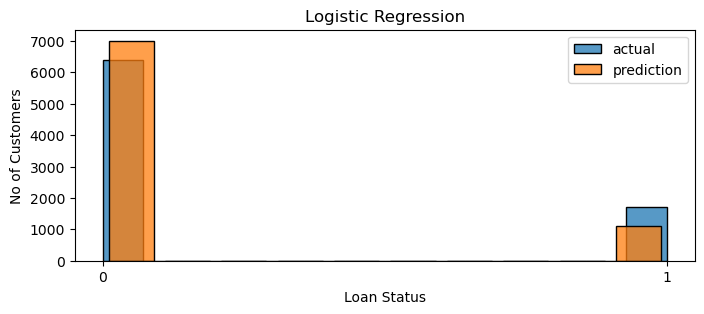

In [30]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df_lgr['Actual'],palette='pastel',label="actual")
sns.histplot(output_df_lgr['Logistic Regression Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('Loan Status')
plt.ylabel('No of Customers')
plt.title('Logistic Regression')
plt.xticks([0, 1])  
plt.legend()

### KNN Classifier

In [32]:
%%time

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))
print('F1 score',metrics.f1_score(y_test, y_test_pred))

Accuracy Score 0.8847909214259282
F1 score 0.6872069658405894
CPU times: total: 2.5 s
Wall time: 2.66 s


In [33]:
output_df_knn = pd.DataFrame({'Actual': y_test})

In [34]:
output_df_knn['knn classifier'] = y_test_pred

output_df_knn

,Actual,knn classifier
25189,0,0
28894,0,0
883,0,0
13504,0,0
1814,0,0
...,...,...
20843,0,0
11919,1,1
26072,0,0
9758,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\764719235.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_knn['Actual'],palette='pastel',label="actual")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\764719235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_knn['knn classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


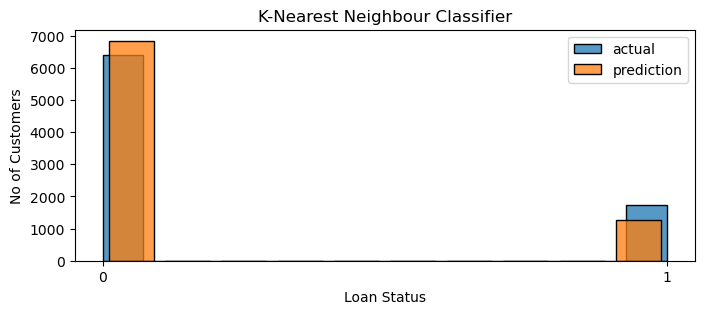

In [35]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df_knn['Actual'],palette='pastel',label="actual")
sns.histplot(output_df_knn['knn classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('Loan Status')
plt.ylabel('No of Customers')
plt.title('K-Nearest Neighbour Classifier')
plt.xticks([0, 1])  
plt.legend()

### Using DT Classifier Algorithm

In [36]:
%%time 

from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier()


classifier.fit(X_train_transformed, y_train)


y_test_pred = classifier.predict(X_test_transformed)


print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))
print('F1 score',metrics.f1_score(y_test, y_test_pred))

Accuracy Score 0.890341680029604
F1 score 0.7447602641401092
CPU times: total: 297 ms
Wall time: 622 ms


In [37]:
output_df_dt = pd.DataFrame({'Actual': y_test})

In [38]:
output_df_dt['dt classifier'] = y_test_pred

output_df_dt

,Actual,dt classifier
25189,0,0
28894,0,0
883,0,1
13504,0,0
1814,0,0
...,...,...
20843,0,0
11919,1,1
26072,0,0
9758,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\1311411035.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_dt['Actual'],palette='pastel',label="actual")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\1311411035.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_dt['dt classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


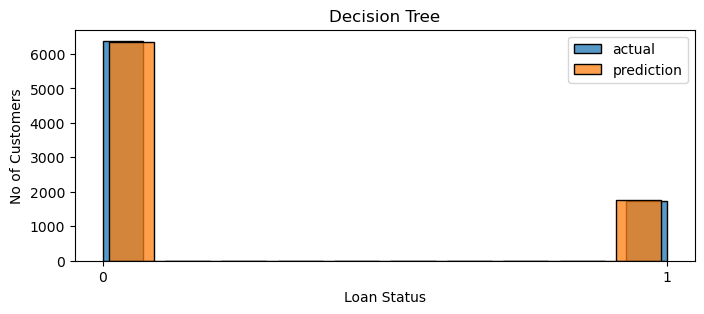

In [39]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df_dt['Actual'],palette='pastel',label="actual")
sns.histplot(output_df_dt['dt classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('Loan Status')
plt.ylabel('No of Customers')
plt.title('Decision Tree')
plt.xticks([0, 1])  
plt.legend()

### Using Random Forest Classifier Algorithm

In [40]:
%%time 

from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier()


classifier.fit(X_train_transformed, y_train)


y_test_pred = classifier.predict(X_test_transformed)


print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))
print('F1 score',metrics.f1_score(y_test, y_test_pred))

Accuracy Score 0.9290736400641421
F1 score 0.806070826306914
CPU times: total: 7.52 s
Wall time: 8.71 s


In [41]:
output_df_rf = pd.DataFrame({'Actual': y_test})

In [42]:
output_df_rf['rf classifier'] = y_test_pred

output_df_rf

,Actual,rf classifier
25189,0,0
28894,0,0
883,0,1
13504,0,0
1814,0,0
...,...,...
20843,0,0
11919,1,1
26072,0,0
9758,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\4164339598.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_rf['Actual'],palette='pastel',label="actual")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\4164339598.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_rf['rf classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


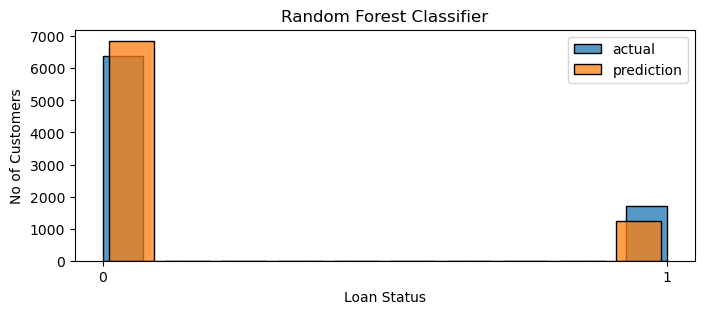

In [43]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df_rf['Actual'],palette='pastel',label="actual")
sns.histplot(output_df_rf['rf classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('Loan Status')
plt.ylabel('No of Customers')
plt.title('Random Forest Classifier')
plt.xticks([0, 1])  
plt.legend()

### svm

In [44]:
%%time

from sklearn import svm


SVM = svm.SVC(kernel='linear')


SVM.fit(X_train_transformed, y_train)


y_test_pred = SVM.predict(X_test_transformed)


print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))
print('F1 score',metrics.f1_score(y_test, y_test_pred))

Accuracy Score 0.8435919575675342
F1 score 0.5293244246473645
CPU times: total: 35.7 s
Wall time: 39.2 s


In [45]:
output_df_svm = pd.DataFrame({'Actual': y_test})

In [46]:
output_df_svm['svm classifier'] = y_test_pred

output_df_svm

,Actual,svm classifier
25189,0,0
28894,0,0
883,0,0
13504,0,0
1814,0,0
...,...,...
20843,0,0
11919,1,1
26072,0,0
9758,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\2241008910.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_svm['Actual'],palette='pastel',label="actual")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\2241008910.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df_svm['svm classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


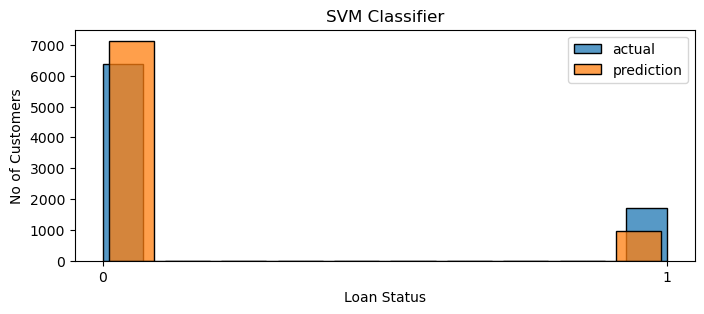

In [47]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df_svm['Actual'],palette='pastel',label="actual")
sns.histplot(output_df_svm['svm classifier'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('Loan Status')
plt.ylabel('No of Customers')
plt.title('SVM Classifier')
plt.xticks([0, 1])  
plt.legend()

## Comparision of different Models

In [56]:
models = ['Logistic Regression','knn','Decision Tree','Random Forest','SVM']
accuracy = [84.12,88.479,89,93,84.359]
f1_score = [54.34,68.72,74.47,80.6,52.93]

In [57]:
Models_Accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy,'F1_score':f1_score})

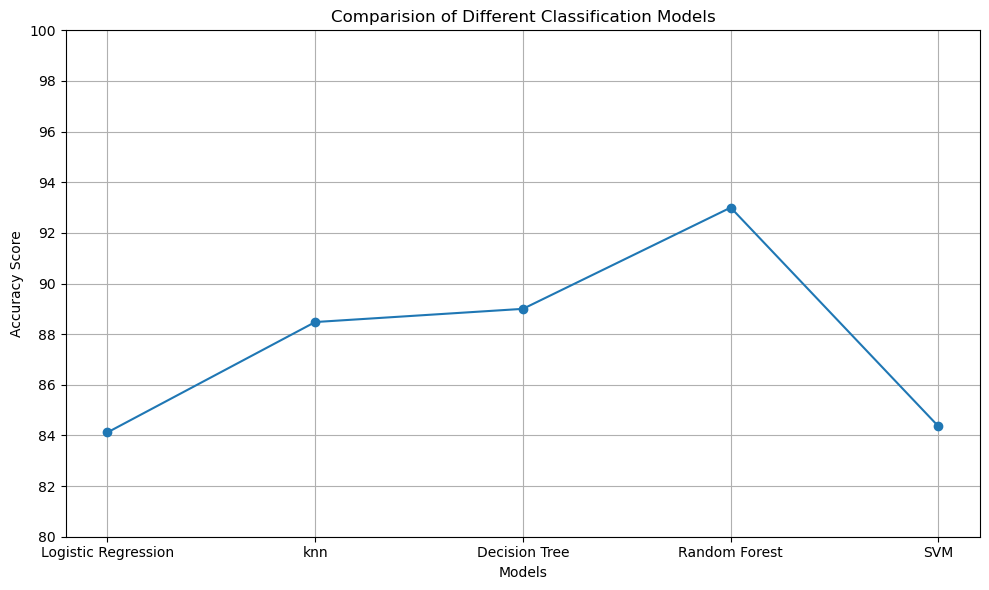

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(Models_Accuracy_df.Model, Models_Accuracy_df.Accuracy, marker='o', linestyle='-')
plt.title('Comparision of Different Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.grid(True) 
plt.yticks(range(80, 101, 2))
plt.tight_layout()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\655472834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=Models_Accuracy_df, palette='pastel')


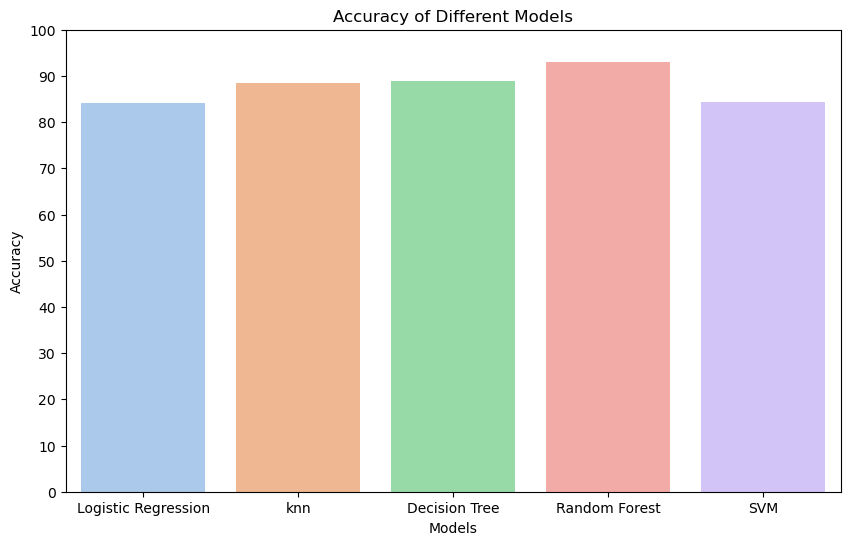

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=Models_Accuracy_df, palette='pastel')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.show()

### We have to go with F1 score, not  accuracy because data is imbalenced

In [60]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,16.02,0.15,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,0.15,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,15.23,0.15,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,14.27,0.15,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...
32422,26.0,45600.0,RENT,1.0,VENTURE,B,20000.0,10.00,0.44,N,4.0
32423,26.0,65004.0,RENT,4.0,PERSONAL,D,20000.0,15.58,0.31,Y,4.0
32424,26.0,64500.0,RENT,0.0,EDUCATION,B,5000.0,11.26,0.08,N,4.0
32425,26.0,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0.11,N,4.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\3276482122.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')


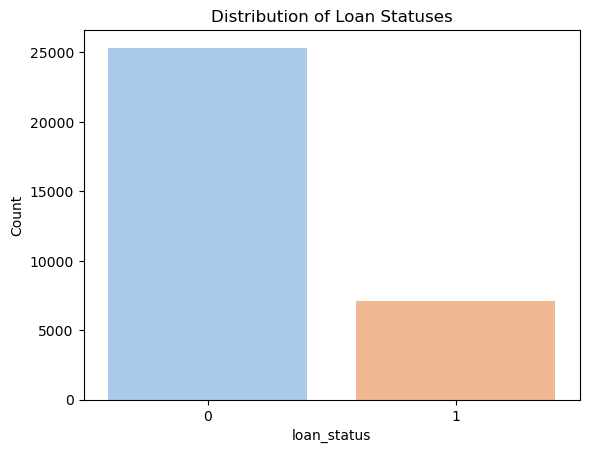

In [61]:
sns.countplot(x=y, palette='pastel')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Distribution of Loan Statuses')
plt.show()

### F1 score

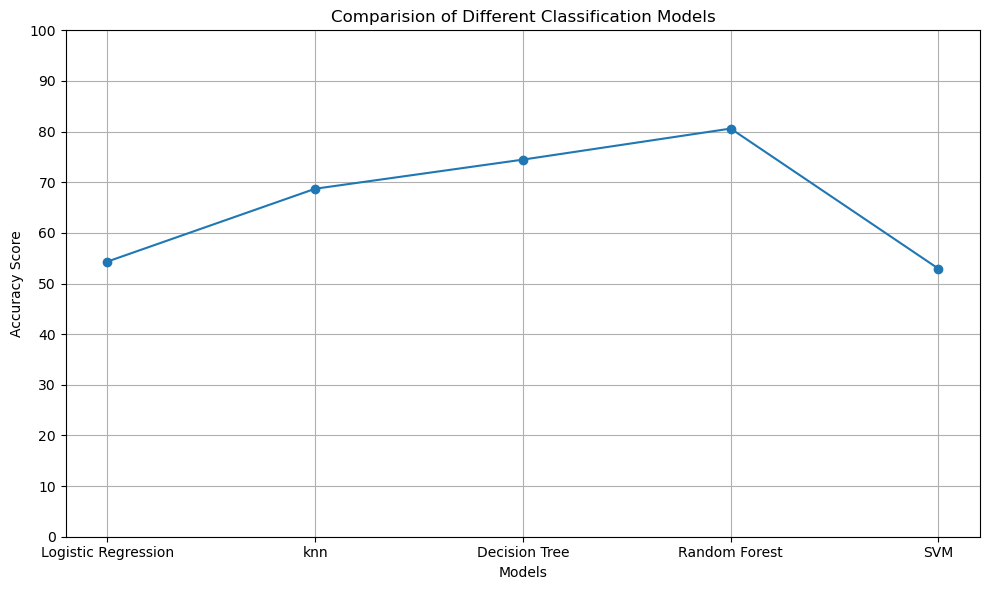

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(Models_Accuracy_df.Model, Models_Accuracy_df.F1_score, marker='o', linestyle='-')
plt.title('Comparision of Different Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.grid(True) 
plt.yticks(range(0, 101, 10))
plt.tight_layout()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18928\116774663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1_score', data=Models_Accuracy_df, palette='pastel')


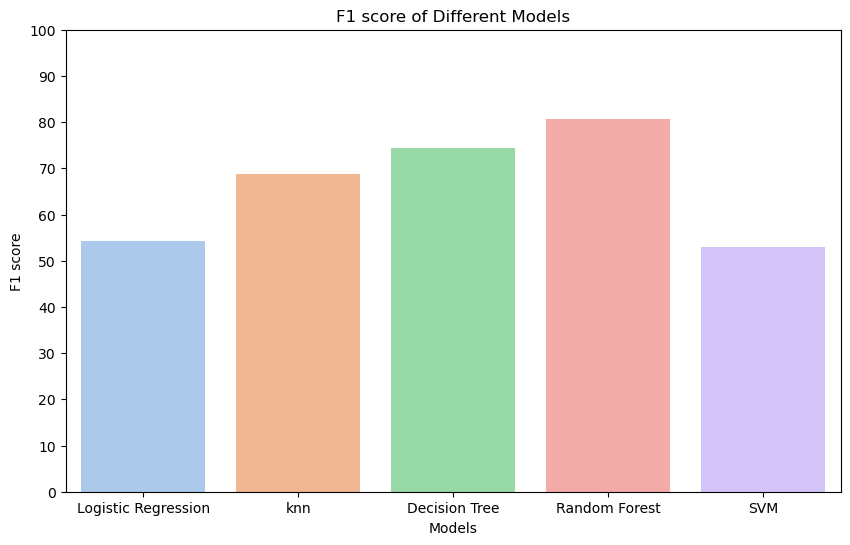

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1_score', data=Models_Accuracy_df, palette='pastel')
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.title('F1 score of Different Models')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.show()